In [2]:
from typing import Any, Union
from pandas import DataFrame
from pandas.io.parsers import TextFileReader
%matplotlib inline
# Main Python imports and params for Mathplotlib
from datetime import datetime, timedelta

import os
import matplotlib as mpl
#if os.environ.get('DISPLAY','') == '':
    #print('no display found. Using non-interactive Agg backend')
    #mpl.use('Agg')

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import seaborn as sns


import numpy as np 
from numpy.random import rand

import time
import traceback
import math

import pandas as pd
import io
import requests

import re
import math

In [3]:
# You can reduce this if plots are too big
plt.rcParams['figure.figsize'] = [18, 13]

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [21]:
# rootUrl = "file://localhost/<path to beam>"
rootUrl = "https://beam-outputs.s3.us-east-2.amazonaws.com/aaltergot/r5vsgh"

beamOutput = "beamville__2020-08-06_13-05-56_dpj"
# beamOutput = "austin-prod-200k-flowCap-0.2-speedScaling-1.1__2020-08-06_02-52-30_pxb"

inputUrl = "{}/{}/R5vsGraphHopper".format(rootUrl,beamOutput)

In [22]:
r5AllRoutesUrl = "{}/{}".format(inputUrl, "r5_routes.csv.gz")
print(r5AllRoutesUrl)
r5AllRoutes = pd.read_csv(r5AllRoutesUrl, compression='gzip', index_col=False)

https://beam-outputs.s3.us-east-2.amazonaws.com/aaltergot/r5vsgh/beamville__2020-08-06_13-05-56_dpj/R5vsGraphHopper/r5_routes.csv.gz


In [23]:
r5AllRoutes.describe()

,person_id,origin_x,origin_y,destination_x,destination_y,number_of_links,distance_in_meters,travel_time,execution_time_ms,is_error,comment
count,3.0,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,0.0
mean,1.0,2.559962e-04,0.022286,0.019551,0.010240,9.333333,4085.986000,336.000000,55.000000,0.0,NaN
std,1.0,3.228746e-07,0.013830,0.017099,0.007790,6.110101,3208.207477,207.855719,89.202018,0.0,NaN
min,0.0,2.556257e-04,0.011745,0.009679,0.001807,4.000000,2211.545000,214.000000,3.000000,0.0,NaN
25%,0.5,2.558858e-04,0.014456,0.009679,0.006776,6.000000,2233.771000,216.000000,3.500000,0.0,NaN
50%,1.0,2.561459e-04,0.017166,0.009679,0.011745,8.000000,2255.997000,218.000000,4.000000,0.0,NaN
75%,1.5,2.561815e-04,0.027556,0.024487,0.014456,12.000000,5023.206500,397.000000,81.000000,0.0,NaN
max,2.0,2.562171e-04,0.037946,0.039295,0.017166,16.000000,7790.416000,576.000000,158.000000,0.0,NaN


In [27]:
r5Routes = r5AllRoutes[r5AllRoutes.is_error == False]
r5Routes.describe()

,person_id,origin_x,origin_y,destination_x,destination_y,number_of_links,distance_in_meters,travel_time,execution_time_ms,is_error,comment
count,3.0,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,0.0
mean,1.0,2.559962e-04,0.022286,0.019551,0.010240,9.333333,4085.986000,336.000000,55.000000,0.0,NaN
std,1.0,3.228746e-07,0.013830,0.017099,0.007790,6.110101,3208.207477,207.855719,89.202018,0.0,NaN
min,0.0,2.556257e-04,0.011745,0.009679,0.001807,4.000000,2211.545000,214.000000,3.000000,0.0,NaN
25%,0.5,2.558858e-04,0.014456,0.009679,0.006776,6.000000,2233.771000,216.000000,3.500000,0.0,NaN
50%,1.0,2.561459e-04,0.017166,0.009679,0.011745,8.000000,2255.997000,218.000000,4.000000,0.0,NaN
75%,1.5,2.561815e-04,0.027556,0.024487,0.014456,12.000000,5023.206500,397.000000,81.000000,0.0,NaN
max,2.0,2.562171e-04,0.037946,0.039295,0.017166,16.000000,7790.416000,576.000000,158.000000,0.0,NaN


In [28]:
r5Errors = r5AllRoutes[r5AllRoutes.is_error == True]
r5Errors.describe()

,person_id,origin_x,origin_y,destination_x,destination_y,number_of_links,distance_in_meters,travel_time,execution_time_ms,is_error,comment
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
ghAllRoutesUrl = "{}/{}".format(inputUrl, "gh_routes.csv.gz")
ghAllRoutes = pd.read_csv(ghAllRoutesUrl, compression='gzip', index_col=False)

In [31]:
ghRoutes = ghAllRoutes[ghAllRoutes.is_error == False]
ghRoutes.describe()

,person_id,origin_x,origin_y,destination_x,destination_y,number_of_links,distance_in_meters,travel_time,execution_time_ms,is_error,comment
count,3.0,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,0.0
mean,1.0,2.559962e-04,0.022286,0.019551,0.010240,4.666667,4528.316455,275.000000,19.000000,0.0,NaN
std,1.0,3.228746e-07,0.013830,0.017099,0.007790,1.154701,3868.630792,192.896345,25.980762,0.0,NaN
min,0.0,2.556257e-04,0.011745,0.009679,0.001807,4.000000,1719.261269,123.000000,4.000000,0.0,NaN
25%,0.5,2.558858e-04,0.014456,0.009679,0.006776,4.000000,2322.040447,166.500000,4.000000,0.0,NaN
50%,1.0,2.561459e-04,0.017166,0.009679,0.011745,4.000000,2924.819625,210.000000,4.000000,0.0,NaN
75%,1.5,2.561815e-04,0.027556,0.024487,0.014456,5.000000,5932.844048,351.000000,26.500000,0.0,NaN
max,2.0,2.562171e-04,0.037946,0.039295,0.017166,6.000000,8940.868470,492.000000,49.000000,0.0,NaN


In [32]:
ghErrors = ghAllRoutes[ghAllRoutes.is_error == True]
ghErrors.describe()

,person_id,origin_x,origin_y,destination_x,destination_y,number_of_links,distance_in_meters,travel_time,execution_time_ms,is_error,comment
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


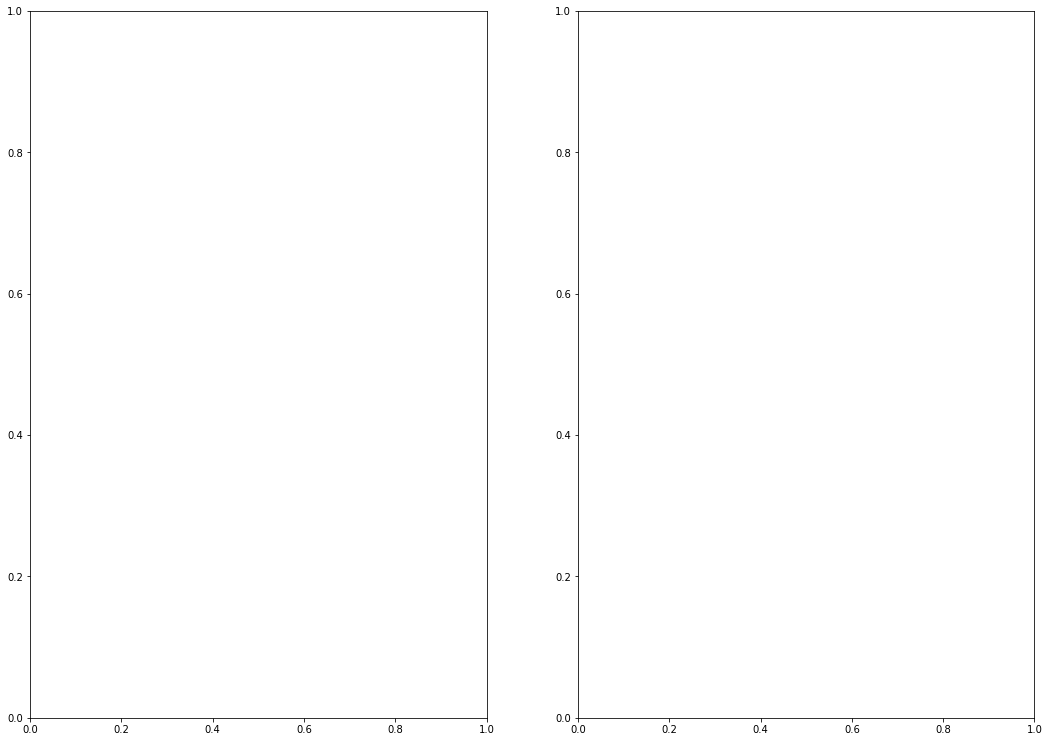

In [34]:
plt.subplot(1, 2, 1)
if not r5Errors.empty:
    r5Errors.distance.plot.hist(bins=80, title='R5: failed distances')
    
plt.subplot(1, 2, 2)
if not ghErrors.empty:
    ghErrors.distance.plot.hist(bins=80, title='GH: failed distances')

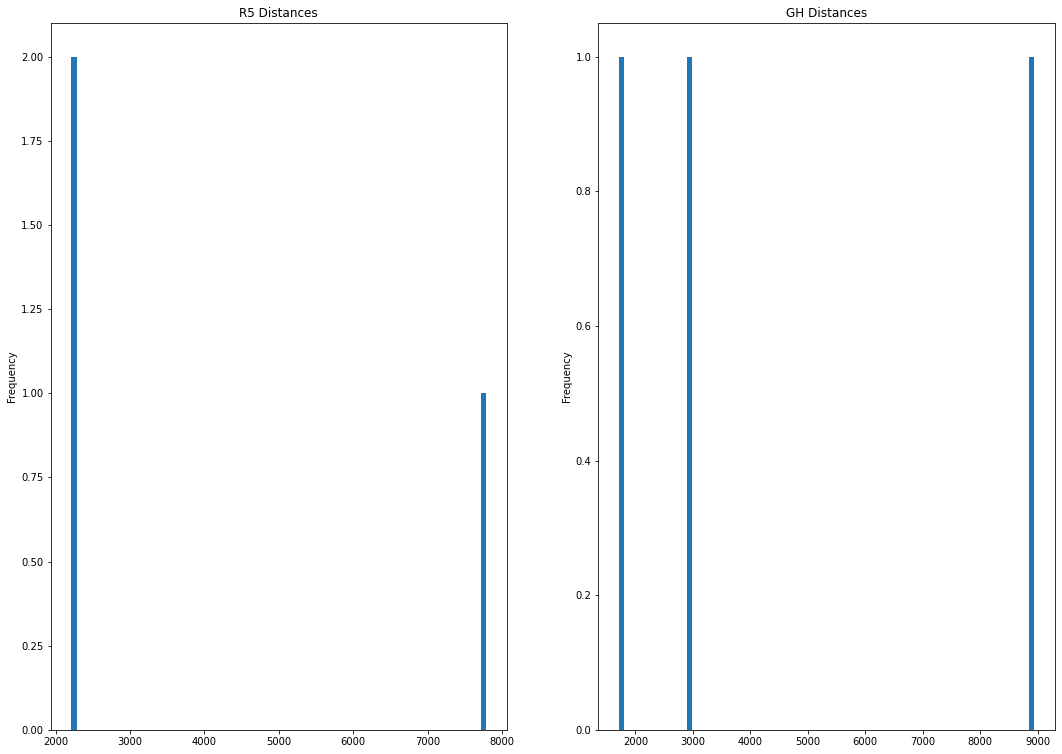

In [35]:
plt.subplot(1, 2, 1)
r5Routes['distance_in_meters'].plot.hist(bins = 80, title='R5 Distances')
plt.subplot(1, 2, 2)
ghRoutes['distance_in_meters'].plot.hist(bins = 80, title='GH Distances')

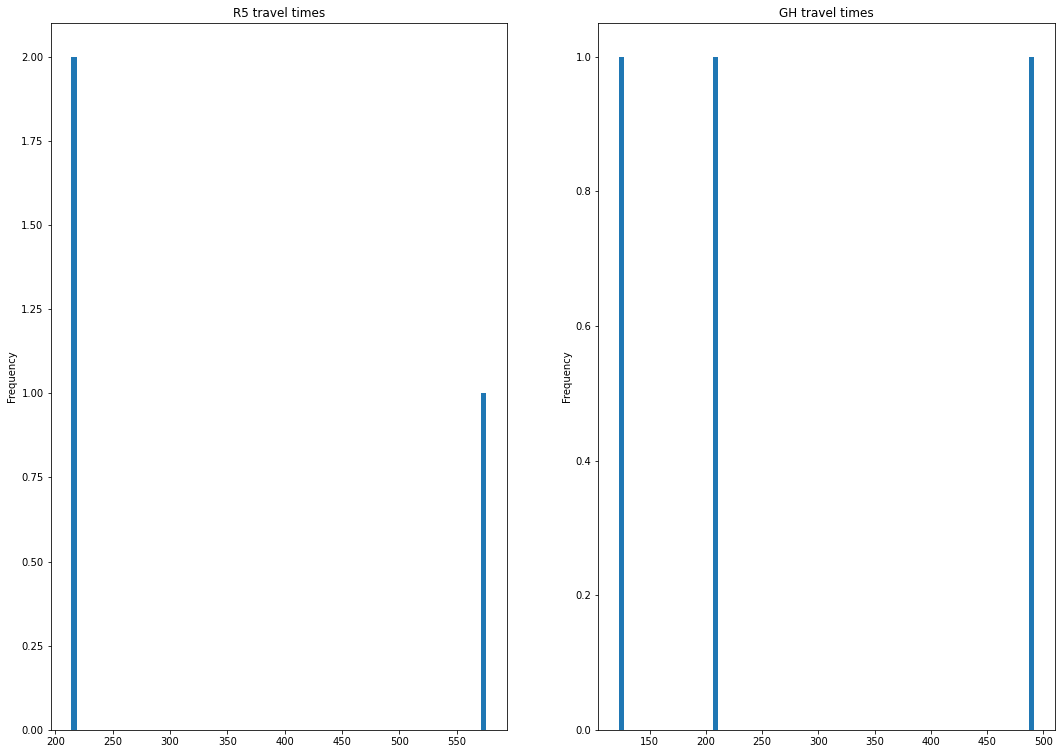

In [37]:
plt.subplot(1, 2, 1)
r5Routes['travel_time'].plot.hist(bins = 80, title='R5 travel times')
plt.subplot(1, 2, 2)
ghRoutes['travel_time'].plot.hist(bins = 80, title='GH travel times')

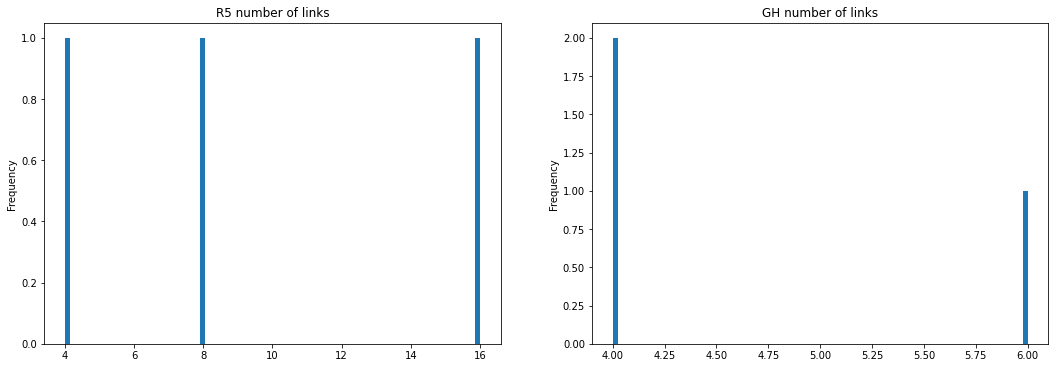

In [38]:
plt.subplot(2, 2, 1)
r5Routes['number_of_links'].plot.hist(bins = 80, title='R5 number of links')
plt.subplot(2, 2, 2)
ghRoutes['number_of_links'].plot.hist(bins = 80, title='GH number of links')

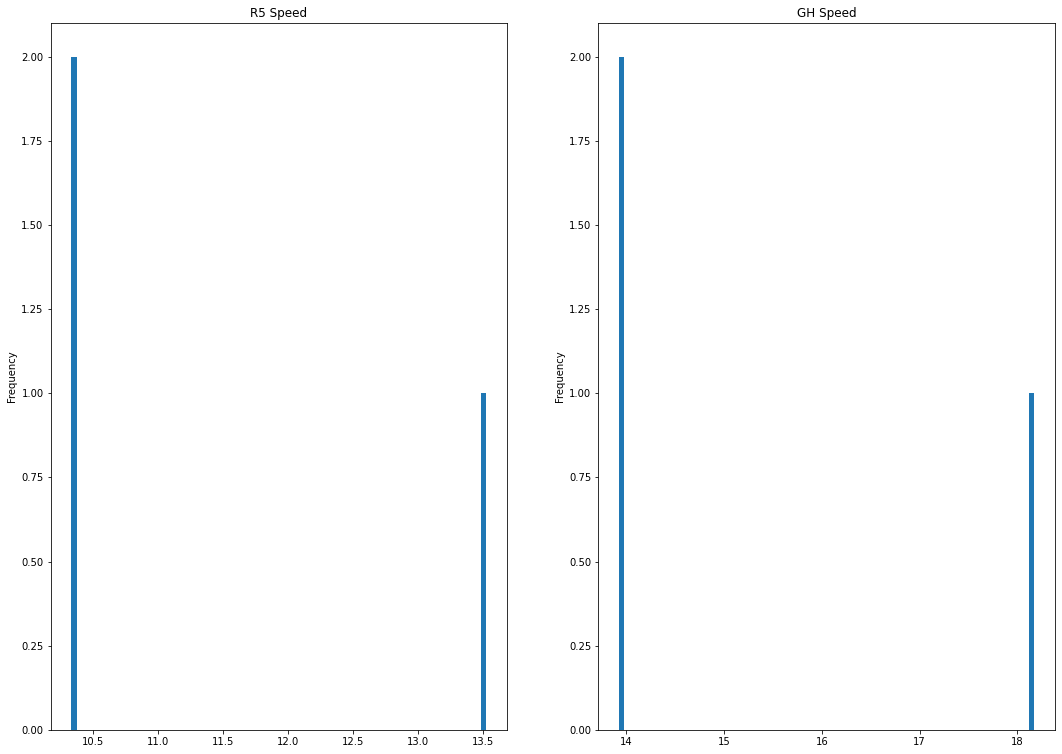

In [39]:
r5Travel = r5Routes[r5Routes['travel_time'] != 0]
r5Travel['speed'] = r5Travel['distance_in_meters'] / r5Travel['travel_time']

ghTravel = ghRoutes[ghRoutes['travel_time'] != 0]
ghTravel['speed'] = ghTravel['distance_in_meters'] / ghTravel['travel_time']

plt.subplot(1, 2, 1)
r5Travel['speed'].plot.hist(bins = 80, title='R5 Speed')
plt.subplot(1, 2, 2)
ghTravel['speed'].plot.hist(bins = 80, title='GH Speed')

In [40]:
# R5 computation time
r5Routes['execution_time_ms'].describe()

count      3.000000
mean      55.000000
std       89.202018
min        3.000000
25%        3.500000
50%        4.000000
75%       81.000000
max      158.000000
Name: execution_time_ms, dtype: float64

In [41]:
# GH computation time
ghRoutes['execution_time_ms'].describe()

count     3.000000
mean     19.000000
std      25.980762
min       4.000000
25%       4.000000
50%       4.000000
75%      26.500000
max      49.000000
Name: execution_time_ms, dtype: float64

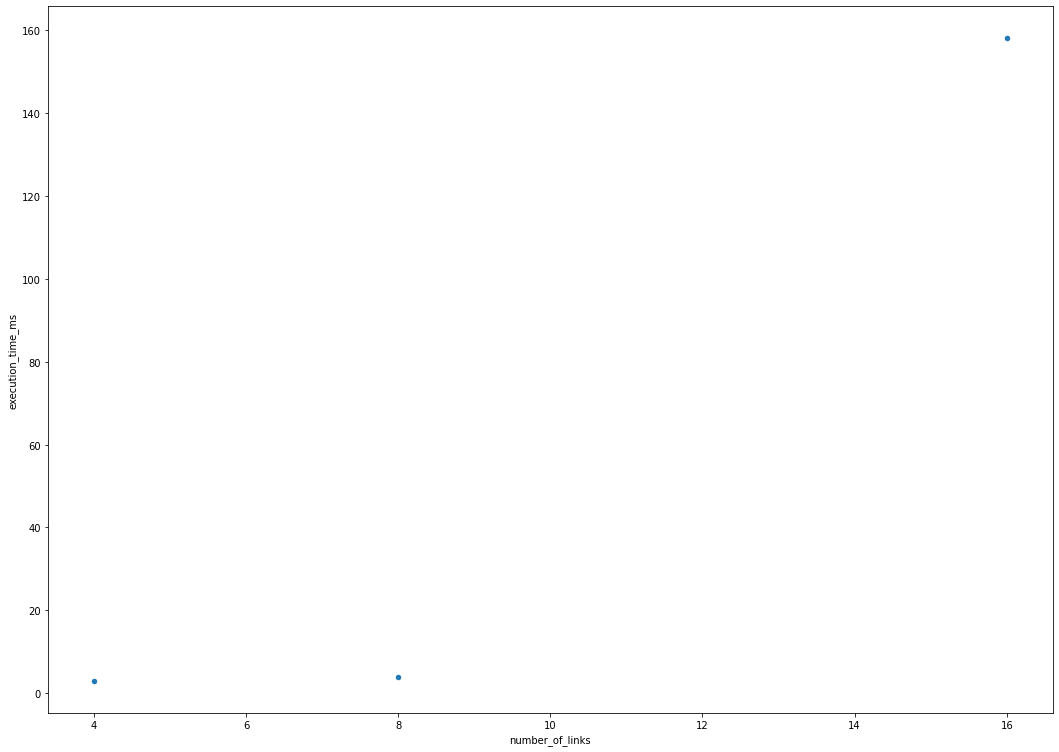

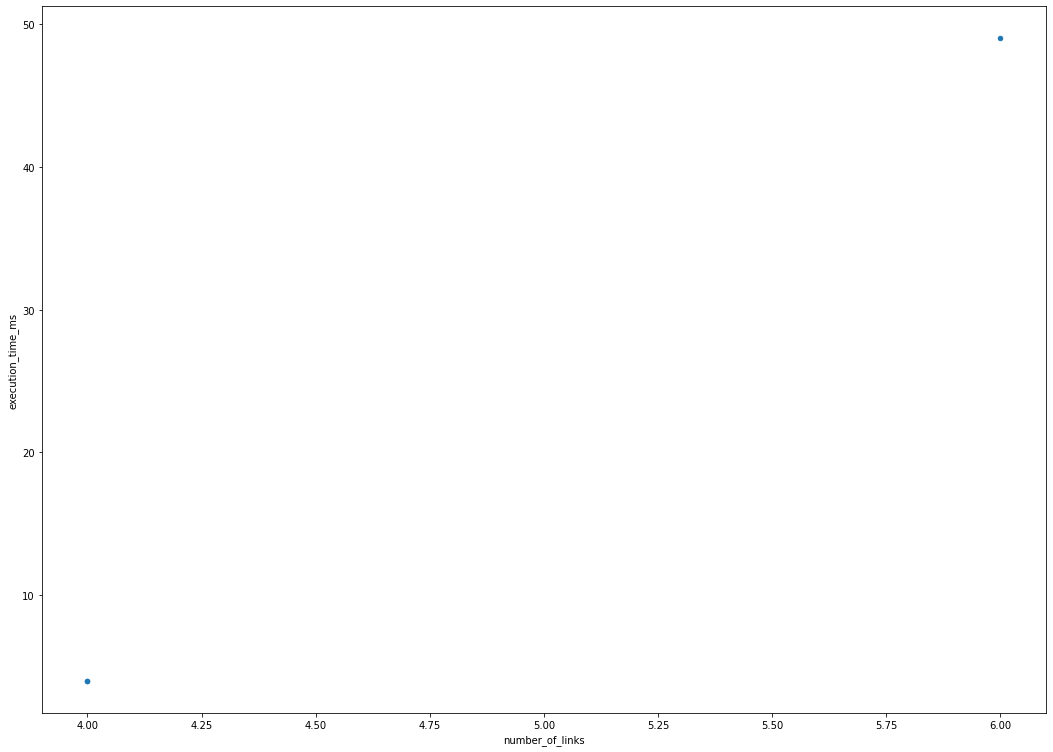

In [47]:
# plt.subplot(1, 2, 1)
r5Routes.plot.scatter(x='number_of_links', y='execution_time_ms')
# r5Routes.plot.scatter(x='distance_in_meters', y='execution_time_ms')

# plt.subplot(1, 2, 2)
ghRoutes.plot.scatter(x='number_of_links', y='execution_time_ms')
# ghRoutes.plot.scatter(x='distance_in_meters', y='execution_time_ms')